<a href="https://colab.research.google.com/github/hadjerseddik/Crop_classification/blob/main/Evaluation/LeafDataset_Evaluation/Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn

import time

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown "https://drive.google.com/u/0/uc?export=download&confirm=Eptv&id=0B_voCy5O5sXMTFByemhpZllYREU" 
!tar -xf /content/drive/MyDrive/leaf classification

Downloading...
From: https://drive.google.com/u/0/uc?export=download&confirm=Eptv&id=0B_voCy5O5sXMTFByemhpZllYREU
To: /content/PlantVillage.tar.gz
830MB [00:06, 138MB/s]
tar: /content/drive/MyDrive/leaf: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
validation_path_file = '/content/drive/MyDrive/Results/leafclassificationDataSet/validation.csv'
validation_df = pd.read_csv(validation_path_file)

In [ ]:
image_size = (224,224)
batch_size = 128
data_set_path = '/content/drive/MyDrive/leaf classification'
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
                  dataframe=validation_df,
                  x_col="path",
                  y_col="label",
                  directory= data_set_path,
                  target_size=image_size,
                  batch_size=batch_size,
                  shuffle=False
                  ) 

Found 1260 validated image filenames belonging to 4 classes.


In [ ]:
model_path = '/content/drive/MyDrive/Results/leafclassificationDataSet/DenseNet121Arch/DenseNet121Arch.h5'
model = load_model(model_path)

In [ ]:
def train_result(history_path):
  train_result_df = pd.read_csv(history_path,index_col=0)
  return train_result_df

In [ ]:
def plot_train_history(train_result_df):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
  train_result_df.plot(ax=axes[0],y=['accuracy','val_accuracy'])
  train_result_df.plot(ax=axes[1],y=['loss','val_loss'])

In [ ]:
def crops_evaluate_mdoel(model,validation_generator):
  classes_names =list(validation_generator.class_indices.keys())
  validation_generator.reset()

  start_time = time.time()
  results = model.predict(validation_generator)
  nb_example = np.array(results).shape[1]
  prediction_duration = (time.time() - start_time)/nb_example

  results = np.array(results)
  predicted_labels_idx = np.argmax(results,axis=1)
  predicted_labels_names = np.array([classes_names[label] for label in predicted_labels_idx])

  real_labels_idx = validation_generator.labels
  real_labels_names = np.array([classes_names[label] for label in real_labels_idx])

  report = classification_report(real_labels_names,predicted_labels_names,labels=classes_names,digits=3,output_dict=True)
  
  result_labels = {}
  for label in classes_names:
    crop_result = report[label]
    result_labels[label]=crop_result

  results_df = pd.DataFrame.from_dict(result_labels,orient='index') 
  
  return results_df

In [ ]:
def global_evaluate_mdoel(model,validation_generator):

  classes_names =list(validation_generator.class_indices.keys())
  validation_generator.reset()

  start_time = time.time()
  results = model.predict(validation_generator)
  nb_example = np.array(results).shape[1]
  prediction_duration = (time.time() - start_time)/nb_example

  results = np.array(results)
  predicted_labels_idx = np.argmax(results,axis=1)
  predicted_labels_names = np.array([classes_names[label] for label in predicted_labels_idx])

  real_labels_idx = validation_generator.labels
  real_labels_names = np.array([classes_names[label] for label in real_labels_idx])

  report = classification_report(real_labels_names,predicted_labels_names,labels=classes_names,digits=3,output_dict=True)
  model_result = {'prediction_duration':prediction_duration,'Accuracy':report['accuracy'],'Precision':report['macro avg']['precision'],'Recall':report['macro avg']['recall'],'F1-score':report['macro avg']['f1-score']}
  
  return model_result

INFO: Srart test of : MobileNetArch
  -----> training history
        loss  accuracy  val_loss  val_accuracy
0   0.521450  0.807967  0.697238      0.779365
1   0.171482  0.939394  0.201854      0.928571
2   0.116093  0.960504  0.155448      0.940476
3   0.084305  0.975826  0.156172      0.946032
4   0.052642  0.983997  0.141244      0.949206
5   0.043491  0.986381  0.140895      0.951587
6   0.036842  0.988083  0.182985      0.938095
7   0.025469  0.995233  0.155998      0.946825
8   0.021100  0.995574  0.154851      0.944444
9   0.015454  0.997276  0.165559      0.951587
10  0.015369  0.995914  0.158064      0.954762
11  0.012206  0.996936  0.162588      0.953968
12  0.009585  0.997957  0.173108      0.950000
13  0.011423  0.997617  0.181405      0.950000
14  0.012339  0.997957  0.170618      0.957143
  -----> training plots
  -----> print results per crop
                precision    recall  f1-score  support
Blight           0.986971  0.971154  0.978998      312
Common_Rust      0.9

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  -----> print results per crop
                precision    recall  f1-score  support
Blight           0.256043  0.916667  0.400280      312
Common_Rust      0.205674  0.069378  0.103757      418
Gray_Leaf_Spot   0.000000  0.000000  0.000000      172
Healthy          0.000000  0.000000  0.000000      358
  -----> plot results per crop


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


INFO: Srart test of : DenseNet121Arch
  -----> training history
        loss  accuracy  val_loss  val_accuracy
0   0.451546  0.828396  0.530333      0.786508
1   0.141591  0.949268  0.198341      0.914286
2   0.090331  0.966973  0.190302      0.923810
3   0.056344  0.983997  0.168271      0.929365
4   0.034998  0.991828  0.134313      0.950794
5   0.025268  0.993871  0.133774      0.950000
6   0.018939  0.996936  0.138458      0.950794
7   0.015707  0.996255  0.137856      0.948413
8   0.020796  0.993531  0.132123      0.953968
9   0.011407  0.996595  0.144180      0.951587
10  0.010550  0.996255  0.139102      0.953968
11  0.008391  0.998638  0.129846      0.957143
12  0.007377  0.998298  0.170961      0.948413
13  0.008591  0.997617  0.145341      0.955556
14  0.008356  0.997617  0.149049      0.953968
  -----> training plots
  -----> print results per crop
                precision    recall  f1-score  support
Blight           0.974763  0.990385  0.982512      312
Common_Rust      0

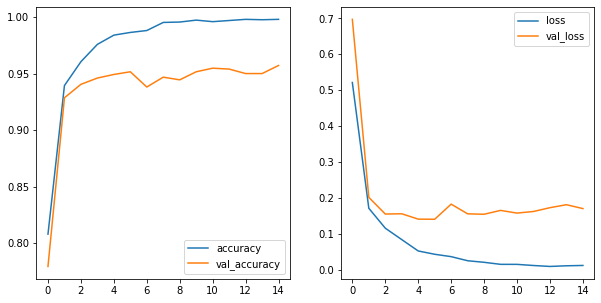

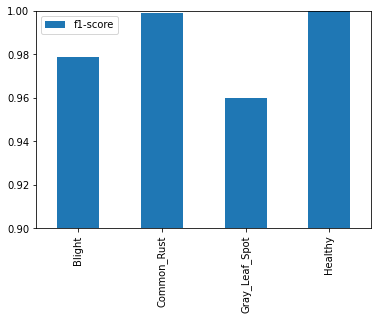

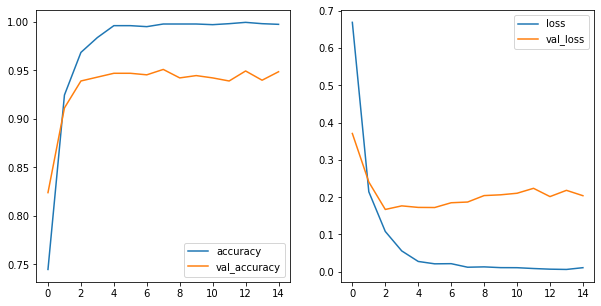

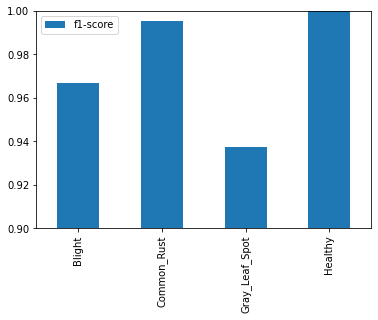

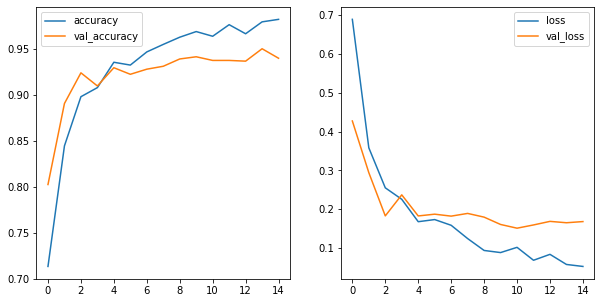

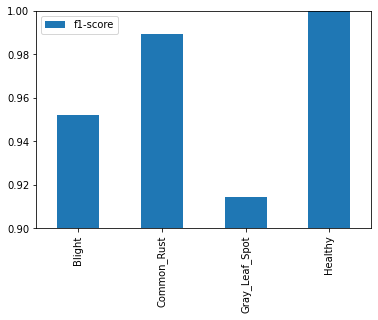

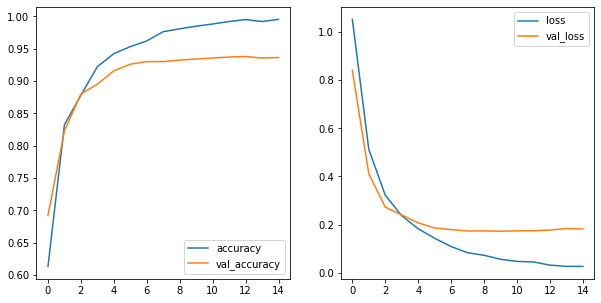

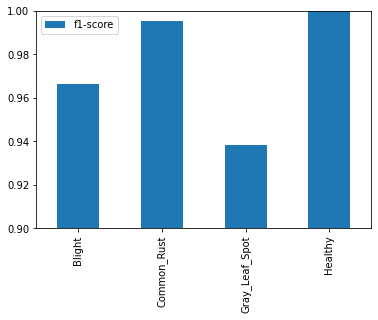

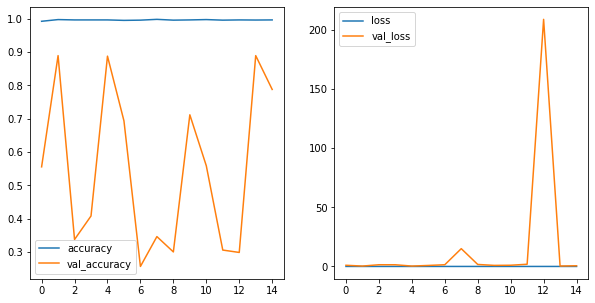

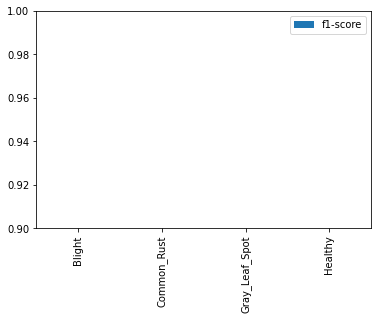

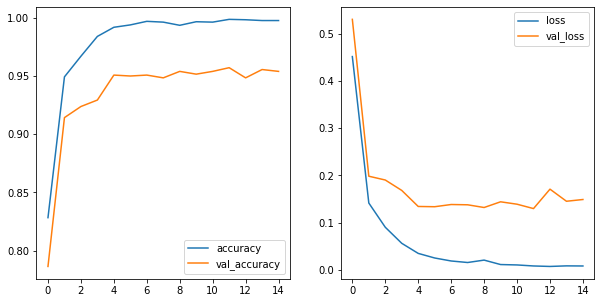

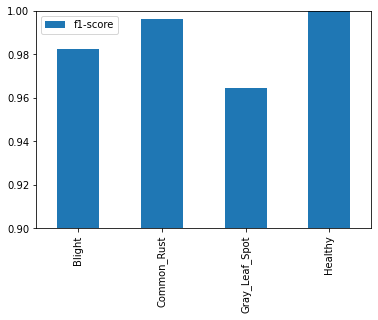

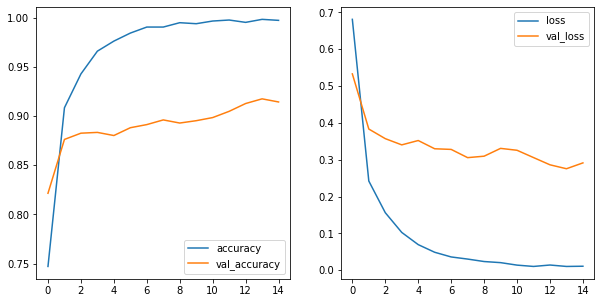

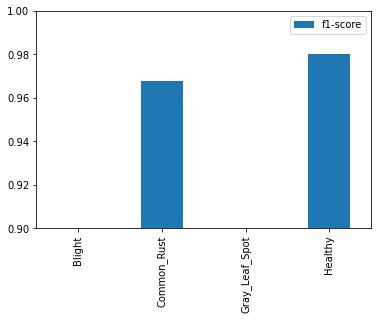

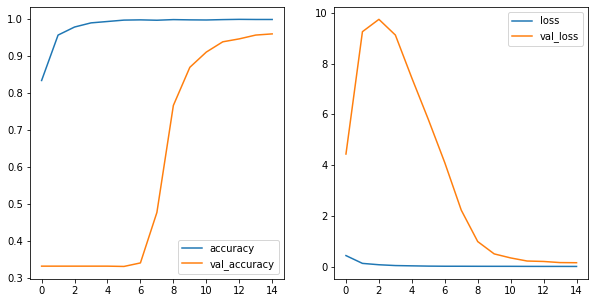

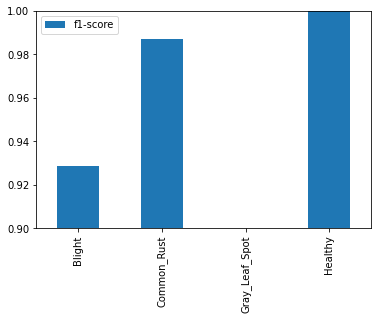

In [ ]:
dataset_folder_path ='/content/drive/MyDrive/Results/leafclassificationDataSet'
archs = os.listdir(dataset_folder_path)
archs.remove('train.csv')
archs.remove('validation.csv')
model_results={}
for arch in archs:
  print('INFO: Srart test of : ' + arch)
  model_path = os.path.join(dataset_folder_path,arch,arch+'.h5')
  model = load_model(model_path)

  history_path = os.path.join(dataset_folder_path,arch,'history.csv')
  train_result_df = train_result(history_path)
  print("  -----> training history")
  print(train_result_df)
  print("  -----> training plots")
  plot_train_history(train_result_df)
  # Save plots

  crop_results_df = crops_evaluate_mdoel(model,validation_generator)
  print("  -----> print results per crop")
  print(crop_results_df)
  # Save crop_results_df
  print("  -----> plot results per crop")
  crop_results_df.plot(y='f1-score',kind='bar',ylim=(0.9,1))
  # Save plots
  # To do
  # Confusion matrix 
  # To do

  model_result = global_evaluate_mdoel(model,validation_generator)
  model_results[arch]=model_result

In [ ]:
glpbal_resuls_df= pd.DataFrame.from_dict(model_results,orient='index')
print("INFO: print global results")
print(glpbal_resuls_df)
#Save the global dataframe results
#To do

INFO: print global results
                    prediction_duration  Accuracy  ...    Recall  F1-score
MobileNetArch                  2.029023  0.988889  ...  0.985521  0.984393
InceptionV3Arch                2.126039  0.981746  ...  0.972194  0.974838
VGG19Arch                      3.074703  0.973016  ...  0.962075  0.963919
XceptionArch                   3.154502  0.981746  ...  0.973947  0.975011
EfficientNetB3Arch             2.559477  0.250000  ...  0.246511  0.126009
DenseNet121Arch                2.289144  0.989683  ...  0.984772  0.985906
NASNetMobileArch               2.178906  0.914286  ...  0.880123  0.887767
ResNet101Arch                  3.747963  0.960317  ...  0.941225  0.945527

[8 rows x 5 columns]


INFO: plot global results


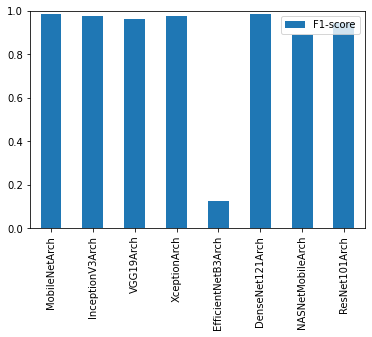

In [ ]:
print("INFO: plot global results")
glpbal_resuls_df.plot(y='F1-score',kind='bar',ylim=(0,1))

INFO: plot global results without EfficientB3Arch


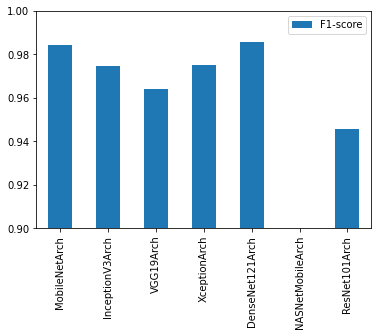

In [ ]:
print("INFO: plot global results without EfficientB3Arch")
data = glpbal_resuls_df.drop(['EfficientNetB3Arch'])
data.plot(y='F1-score',kind='bar',ylim=(0.9,1))

***Matrix confution***

In [ ]:
Classes_names =list(validation_generator.class_indices.keys())

In [ ]:
validation_generator.reset()
results = model.predict(validation_generator)
results = np.array(results)
predicted_labels_idx = np.argmax(results,axis=1)
predicted_labels_names = np.array([Classes_names[label] for label in predicted_labels_idx])
print(predicted_labels_names.shape)

(1260,)


In [ ]:
real_labels_idx = validation_generator.labels
real_labels_names = np.array([Classes_names[label] for label in real_labels_idx])
print(real_labels_names.shape)

(1260,)


In [ ]:
print(classification_report(real_labels_names,predicted_labels_names,labels=Classes_names))

                precision    recall  f1-score   support

        Blight       0.92      0.94      0.93       312
   Common_Rust       0.98      1.00      0.99       418
Gray_Leaf_Spot       0.91      0.83      0.87       172
       Healthy       1.00      1.00      1.00       358

      accuracy                           0.96      1260
     macro avg       0.95      0.94      0.95      1260
  weighted avg       0.96      0.96      0.96      1260



In [ ]:
conf_matrix = confusion_matrix(real_labels_names,predicted_labels_names,labels=Classes_names,normalize='pred')
conf_matrix_df = pd.DataFrame(conf_matrix, index = Classes_names,columns = Classes_names)

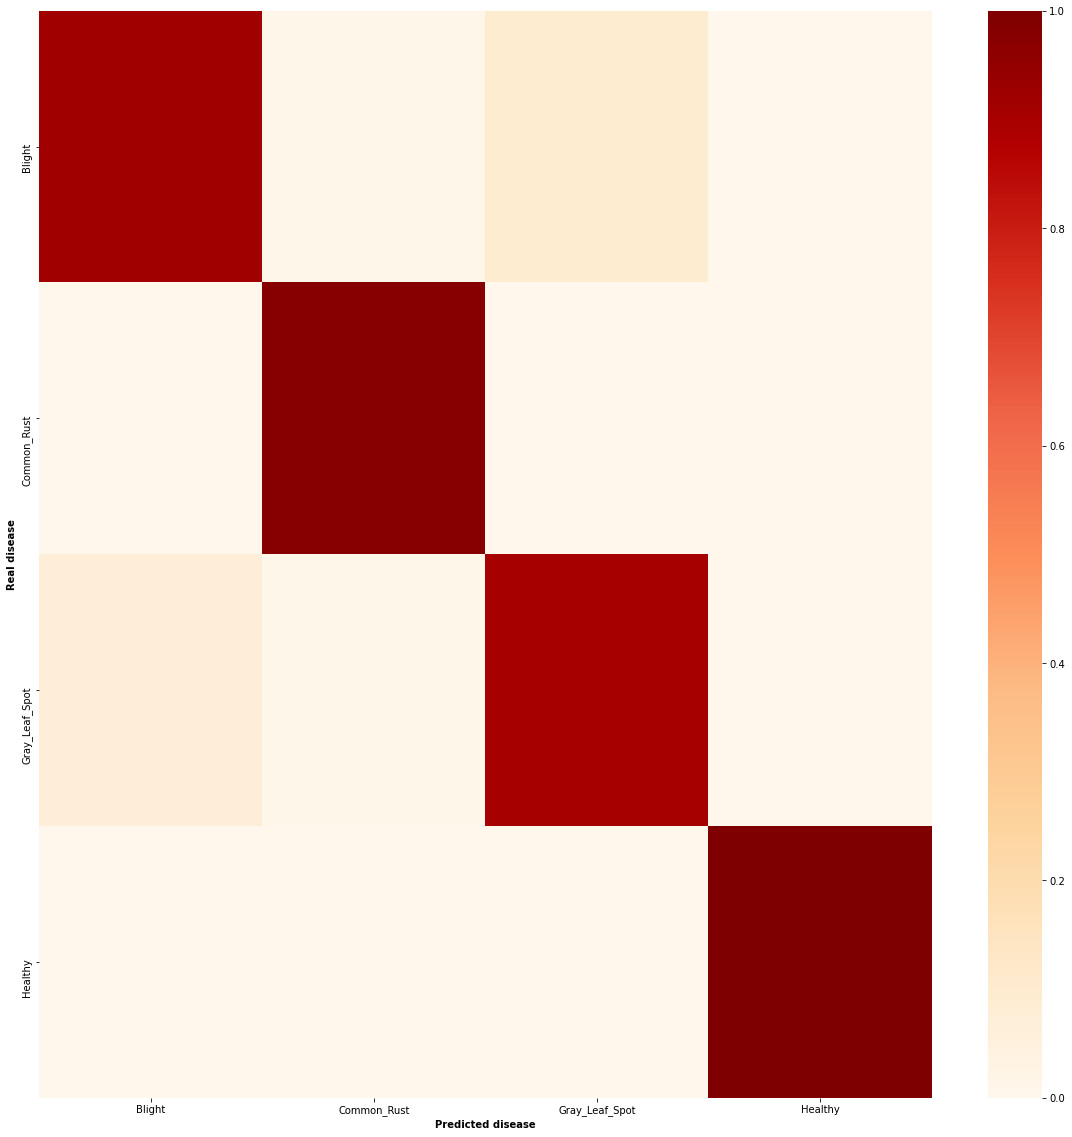

In [ ]:
plt.figure(figsize = (20,20))
heatmap = sn.heatmap(conf_matrix_df, annot=False,fmt='.2f',cmap="OrRd",vmin=0, vmax=1)
heatmap.set_xlabel('Predicted disease',fontsize = 10,fontweight="bold")
heatmap.set_ylabel('Real disease',fontsize = 10,fontweight="bold")
heatmap.figure.savefig("Confusion matrix.png")

***save dataframe***

In [ ]:
glpbal_resuls_df.to_csv("new_dogs_with_bmi.csv")

In [ ]:
validation_df.to_csv("new_dogs_with_bmi.csv")

In [ ]:
train_result_df.to_csv("new_dogs_with_bmi.csv")